In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
#from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc

filename = 'capture20110810.binetflow'
try:
    # try to load the file from a local directory
    data = pd.read_csv(filename)
    pass
except:
    # fetch it from the url
    data = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/{}'.format(filename))
    data.to_csv(filename)
    pass

In [15]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [16]:
data['Target'] = data['Label'].str.startswith('flow=From-Botnet').astype(int)

In [17]:
targetno = data[data['Target']==0]

In [18]:
targetyes = data[data['Target']==1]

In [19]:
print('Percent Minority %f' % ((sum(data['Target'])/len(data['Target']))*100))

Percent Minority 1.450134


In [20]:
targetno.shape

(2783675, 16)

In [21]:
drop_indices = np.random.choice(targetno.index, 2750000, replace=False)
targetno_new = targetno.drop(drop_indices)

In [22]:
net_flows_new = targetno_new.append(targetyes)

In [23]:
print('Percent Minority %f' % ((sum(net_flows_new['Target'])/len(net_flows_new['Target']))*100))

Percent Minority 54.881023


In [24]:
net_flows = net_flows_new.dropna()
X = net_flows.iloc[:,0:13]
y = net_flows['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

In [25]:
print('Percent Minority %f' % ((sum(y_train)/len(y_train))*100))

Percent Minority 47.171585


# Smote takes too long with categoricals, so I manaully resampled

In [13]:
#categorics = ['StartTime', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr', 'Dport', 'State', 'Label']

In [14]:
#cat_index = [net_flows.columns.get_loc(c) for c in categorics if c in X]

In [15]:
#sm = SMOTENC(random_state = 42, categorical_features=[0, 2, 3, 4, 5, 6, 7, 8])

In [16]:
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [17]:
#print('Percent Minority %f' % ((sum(y_res)/len(y_res))*100))

# Going to try to pickle from here

In [18]:
#categorical_features = ['Proto','Dir','State']
##categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
#preprocessor = ColumnTransformer(
#    transformers=[('cat', categorical_transformer, categorical_features)])
#clf = Pipeline(steps=[('preprocessor', preprocessor),
#                      ('clf', RandomForestClassifier(min_samples_leaf = 10))])

In [19]:
#make_pickle = clf.fit(X_train, y_train)

In [6]:
#with open('{}.pkl'.format('pickle'), 'wb') as f:
#    pkl.dump(make_pickle, f)

NameError: name 'make_pickle' is not defined

In [12]:
path = 'C:\\Users\\seeth\\Downloads\\resampled-pickle.pkl'
with open(path, 'rb') as f:
    model_ctu_13 = pkl.load(f)

C:\Users\seeth\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\seeth\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\seeth\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\seeth\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2 when using version 0.22.1. This might lead to breaking code or invalid results. U

In [26]:
y_pred = model_ctu_13.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69     15712
           1       0.93      0.00      0.01     14075

    accuracy                           0.53     29787
   macro avg       0.73      0.50      0.35     29787
weighted avg       0.72      0.53      0.37     29787



In [29]:
print("model score: %.3f" % model_ctu_13.score(X_test, y_test))
print(classification_report(y_test, y_pred))


disp = plot_confusion_matrix(clf, X_test, y_test)

print(disp.confusion_matrix)

model score: 0.529
              precision    recall  f1-score   support

           0       0.53      1.00      0.69     15712
           1       0.93      0.00      0.01     14075

    accuracy                           0.53     29787
   macro avg       0.73      0.50      0.35     29787
weighted avg       0.72      0.53      0.37     29787



NameError: name 'clf' is not defined

roc_auc_score: 0.552


Text(0.5, 1.0, 'ROC curve')

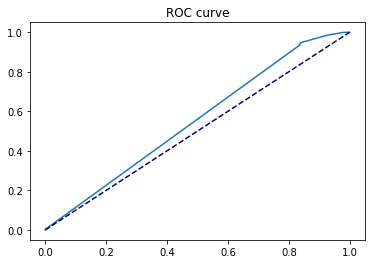

In [30]:
y_score = model_ctu_13.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc = roc_auc_score(y_test, y_score)
print('roc_auc_score: {:.3f}'.format(roc_auc))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # dadgum no-skill line
plt.title('ROC curve')

In [31]:
print(thresholds)

[1.62961697 0.62961697 0.49720479 0.47641399 0.40017472 0.37735169
 0.37698626 0.3080844  0.29834552 0.28467146 0.28304246 0.27375184
 0.27265262 0.27101789 0.27020425 0.25825651 0.25550654 0.25267917
 0.25051274 0.23184669 0.21173736 0.19974317 0.17749965 0.17535396
 0.13668177 0.11264285]


In [34]:
from scipy.stats import hmean
import numpy.ma as ma

precision, recall, thresholds_2 = precision_recall_curve(y_test, y_score)

a = np.column_stack((recall,precision))

a = ma.masked_less_equal(a,0)
a = ma.mask_rows(a)
f1 = hmean(a,axis=1)

In [37]:
threshold_maximizing_F1 = thresholds[np.argmax(f1)]
print('f1 optimizing threshold: {}'.format(threshold_maximizing_F1))

f1 optimizing threshold: 0.25550653879194696
